Import Library

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
#import seaborn as sns

import pandas as pd
import pandas as pd
import numpy as np
import re 
import nltk 
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score, KFold


from io import StringIO
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import chi2
from IPython.display import display
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn import metrics

from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.metrics import classification_report,confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline
#import seaborn as sns
plt.style.use('ggplot')
import matplotlib.patches as mpatches

# 2. Data Load and Data Understanding

In [2]:
# df_train = pd.read_csv("Dataset/train.txt", delimiter=';', header=None, names=['sentence','label'])
# df_test = pd.read_csv("Dataset/test.txt", delimiter=';', header=None, names=['sentence','label'])
# df_val = pd.read_csv("Dataset/val.txt", delimiter=';', header=None, names=['sentence','label'])

df_train = pd.read_csv("Dataset/EmotionsMultiClass/train.txt", sep=';',names=['text','emotion'])
df_test = pd.read_csv("Dataset/EmotionsMultiClass/test.txt", sep=';',names=['text','emotion'])
df_val = pd.read_csv("Dataset/EmotionsMultiClass/val.txt", sep=';',names=['text','emotion'])

In [3]:
#Menyatukan data validasi dengan data latih
# frames = [df_train, df_val]
# df = pd.concat(frames)
# df = df.reset_index()
# df = df.drop(columns = "index")

In [4]:
# df

In [5]:
#joy
joy_text = df_train[df_train["emotion"] == 'joy']["text"].values
for i in range(0,5):
    print(joy_text[i], "\n")

i have been with petronas for years i feel that petronas has performed well and made a huge profit 

i do feel that running is a divine experience and that i can expect to have some type of spiritual encounter 

i have immense sympathy with the general point but as a possible proto writer trying to find time to write in the corners of life and with no sign of an agent let alone a publishing contract this feels a little precious 

i do not feel reassured anxiety is on each side 

i have the feeling she was amused and delighted 



In [6]:
#sad
sadness_text = df_train[df_train["emotion"] == 'sadness']["text"].values
for i in range(0,5):
    print(sadness_text[i], "\n")

i didnt feel humiliated 

i can go from feeling so hopeless to so damned hopeful just from being around someone who cares and is awake 

ive been feeling a little burdened lately wasnt sure why that was 

i feel like i have to make the suffering i m seeing mean something 

i feel low energy i m just thirsty 



In [7]:
#anger 
anger_text = df_train[df_train["emotion"] == 'anger']["text"].values
for i in range(0,5):
    print(anger_text[i], "\n")

im grabbing a minute to post i feel greedy wrong 

i am feeling grouchy 

i think it s the easiest time of year to feel dissatisfied 

i feel irritated and rejected without anyone doing anything or saying anything 

i already feel like i fucked up though because i dont usually eat at all in the morning 



In [8]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16000 entries, 0 to 15999
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   text     16000 non-null  object
 1   emotion  16000 non-null  object
dtypes: object(2)
memory usage: 250.1+ KB


In [9]:
df_train.describe()

,text,emotion
count,16000,16000
unique,15969,6
top,i feel on the verge of tears from weariness i ...,joy
freq,2,5362


In [10]:
list(df_train.emotion.unique())

['sadness', 'anger', 'love', 'surprise', 'fear', 'joy']

In [11]:
df_train.head(10)

,text,emotion
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger
5,ive been feeling a little burdened lately wasn...,sadness
6,ive been taking or milligrams or times recomme...,surprise
7,i feel as confused about life as a teenager or...,fear
8,i have been with petronas for years i feel tha...,joy
9,i feel romantic too,love


In [12]:
#Melihat data yang hilang
def missing_percentage(df_train):
    """This function takes a DataFrame(df) as input and returns two columns, total missing values and total missing values percentage"""
    total = df_train.isnull().sum().sort_values(ascending = False)
    percent = round(df_train.isnull().sum().sort_values(ascending = False)/len(df_train)*100,2)
    return pd.concat([total, percent], axis=1, keys=['Total','Percent'])

missing_percentage(df_train)

,Total,Percent
text,0,0.0
emotion,0,0.0


In [13]:
# #Melihat Sebaran Label
# import seaborn as sns
# sns.countplot(x ='label', data = df,order = df["label"].value_counts().index)
 
# # Show the plot
# plt.show()

In [14]:
from wordcloud import WordCloud
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
#nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to C:\Users\Asif
[nltk_data]     Raza\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


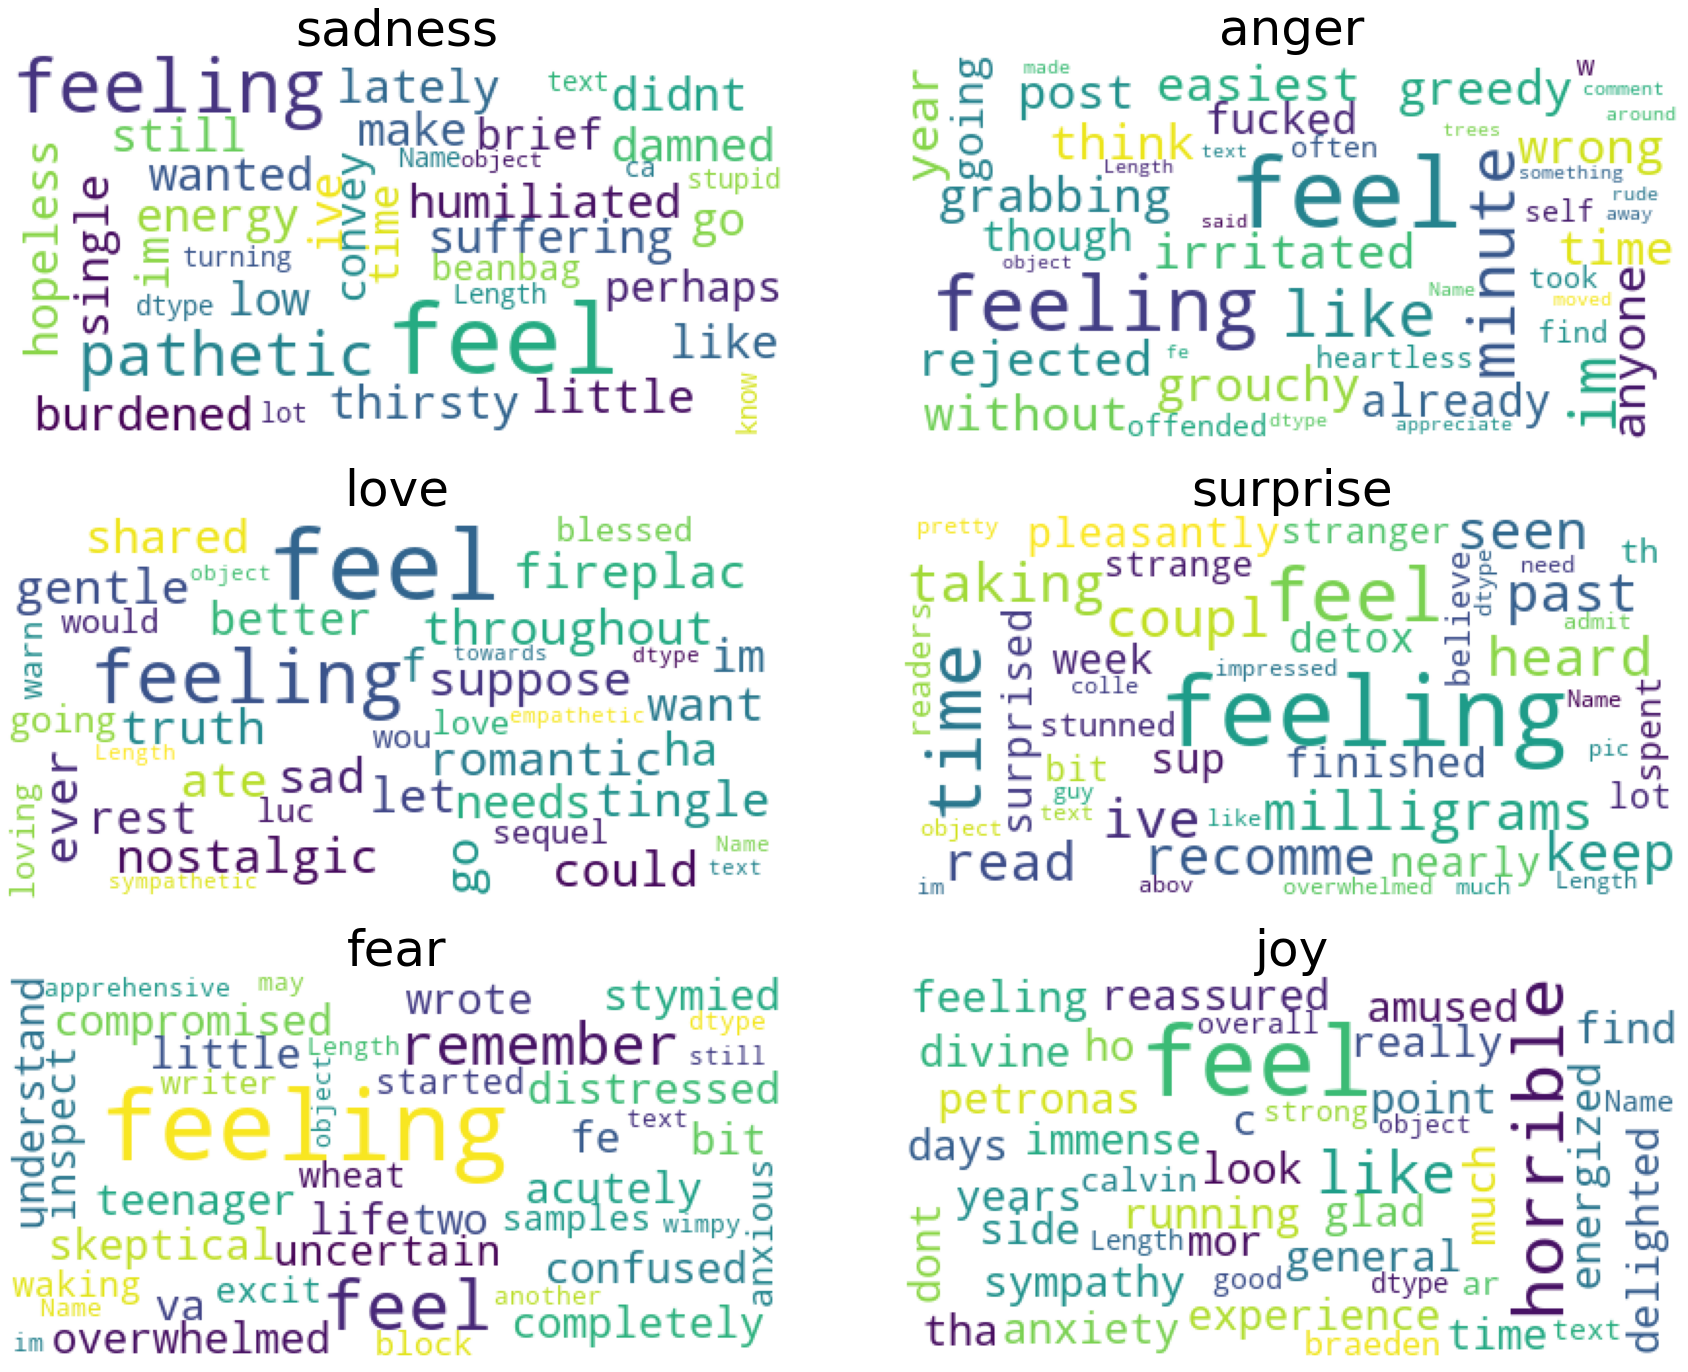

In [15]:
def get_wordcloud(text):
    wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white", stopwords=stopwords.words('english')).generate(str(text))
    
    return wordcloud

emotions = df_train["emotion"].unique()

figure, axes = plt.subplots(ncols=2, nrows=3,figsize=(30,25))
plt.axis('off')

# for each emotion
for emotion, ax in zip(emotions, axes.flat):
    wordcloud = get_wordcloud(df_train[df_train["emotion"]==emotion]['text'])
    ax.imshow(wordcloud)
    ax.title.set_text(emotion)
    ax.title.set_size(50)
    
    ax.axis('off')
    
plt.subplots_adjust(wspace=0.15, hspace=0.05)

<AxesSubplot:>

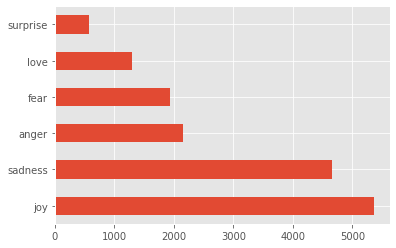

In [16]:
#Data Visulalization

df_train['emotion'].value_counts().plot(kind='barh')

<AxesSubplot:ylabel='emotion'>

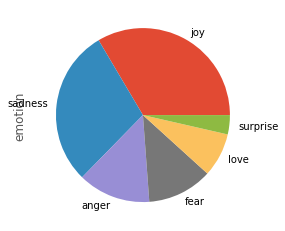

In [17]:
df_train['emotion'].value_counts().plot(kind='pie')

 Label Encoding

In [18]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
df_train['label_enc'] = labelencoder.fit_transform(df_train['emotion'])
df_test['label_enc'] = labelencoder.transform(df_test['emotion'])

In [19]:
map = df_train[['emotion','label_enc']].drop_duplicates(keep='first')
map

,emotion,label_enc
0,sadness,4
2,anger,0
3,love,3
6,surprise,5
7,fear,1
8,joy,2


In [20]:
targets = labelencoder.inverse_transform([0,1,2,3,4,5])
targets

array(['anger', 'fear', 'joy', 'love', 'sadness', 'surprise'],
      dtype=object)

In [21]:
def relabel(a) :
    if a == 4 :
        o = "sadness"
    elif a == 0 :
        o = "anger"
    elif a == 3 :
        o = "love"
    elif a == 5 :
        o = "surprise"
    elif a == 1 :
        o = "fear"
    else :
        o = "joy"
    return o

In [22]:
df_test[['emotion','label_enc']].drop_duplicates(keep='first')

,emotion,label_enc
0,sadness,4
3,joy,2
5,fear,1
6,anger,0
14,love,3
65,surprise,5


In [23]:
# import nltk
# nltk.download('punkt')
# from nltk.stem.porter import PorterStemmer
# from nltk.tokenize.treebank import TreebankWordDetokenizer

# porter_stemmer = PorterStemmer()    

# sentence_stemm_train = []
# for i in range(df.shape[0]):
#     word_data = df.sentence[i]
#     nltk_tokens = nltk.word_tokenize(word_data)
#     word=[]
#     for w in nltk_tokens:
#         word.append(porter_stemmer.stem(w))
#     sentence = TreebankWordDetokenizer().detokenize(word)
#     sentence_stemm_train.append(sentence)

# sentence_stemm_test = []
# for i in range(df_test.shape[0]):
#     word_data = df_test.sentence[i]
#     nltk_tokens = nltk.word_tokenize(word_data)
#     word=[]
#     for w in nltk_tokens:
#         word.append(porter_stemmer.stem(w))
#     sentence = TreebankWordDetokenizer().detokenize(word)
#     sentence_stemm_test.append(sentence)

# df["sentence_stemm"] = np.array(sentence_stemm_train)
# df_test["sentence_stemm"] = np.array(sentence_stemm_test)

  Tfidf

In [24]:
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, stop_words='english')

# We transform each text into a vector
features_train = tfidf.fit_transform(df_train.text).toarray()
features_test = tfidf.transform(df_test.text).toarray()

features_train_name = tfidf.get_feature_names()

labels = df_train.label_enc

print("Number of features after extracting "+str(features_train.shape[1]))

Number of features after extracting 3152


c:\Users\Asif Raza\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [25]:
feature_train_df = pd.DataFrame(data=features_train,    # values,    # 1st column as index
                                columns=features_train_name)  # 1st row as the column names

In [26]:
feature_train_df

,abandoned,abilities,ability,able,absolute,absolutely,abuse,abused,accept,acceptable,...,york,youd,youll,young,younger,youre,youth,youve,zero,zone
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


LinearSVC()

In [27]:
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

#mencoba beberapa algoritma machine learning

# models = [
#     RandomForestClassifier,
#     LinearSVC(),
#     MultinomialNB(),XGBClassifier()
# ]

models = [LinearSVC()]

# 5 Cross-validation
CV = 10
cv_df = pd.DataFrame(index=range(CV * len(models)))

entries = []
for model in models:
    model_name = model.__class__.__name__
    accuracies = cross_val_score(model, features_train, labels, scoring='f1_macro', cv=CV)
    for fold_idx, accuracy in enumerate(accuracies):
        entries.append((model_name, fold_idx, accuracy))
    
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'f1_macro'])

In [28]:
mean_f1 = cv_df.groupby('model_name').f1_macro.mean()
std_f1 = cv_df.groupby('model_name').f1_macro.std()

f1 = pd.concat([mean_f1, std_f1], axis= 1, 
          ignore_index=True)
f1.columns = ['Mean F1_Macro', 'Standard deviation']
f1

,Mean F1_Macro,Standard deviation
model_name,,
LinearSVC,0.853569,0.011213


In [29]:
#model = LinearSVC()

from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB(alpha=.01)


model.fit(features_train, labels)
y_pred = model.predict(features_test)

In [30]:
# labels

 Data Testing 

In [31]:
pred_cat = []
for i in y_pred:
  cat = relabel(i)
  pred_cat.append(cat)
pred_cat = np.array(pred_cat)

In [32]:
print(classification_report(df_test.emotion, pred_cat))

              precision    recall  f1-score   support

       anger       0.88      0.67      0.76       275
        fear       0.82      0.68      0.74       224
         joy       0.76      0.93      0.84       695
        love       0.80      0.44      0.57       159
     sadness       0.80      0.89      0.85       581
    surprise       0.95      0.32      0.48        66

    accuracy                           0.80      2000
   macro avg       0.84      0.66      0.71      2000
weighted avg       0.81      0.80      0.79      2000



In [33]:
def predict_emotion(text):
    x = tfidf.transform([text]).toarray()
    pred = relabel(model.predict(x))
    return pred

In [34]:
text = "i am feeling sad"
predict_emotion(text)

'sadness'

## SHAP

In [35]:
import shap
import transformers


tokenizer = transformers.AutoTokenizer.from_pretrained("nateraw/bert-base-uncased-emotion", use_fast=True)
model = transformers.AutoModelForSequenceClassification.from_pretrained("nateraw/bert-base-uncased-emotion")

classifier = transformers.pipeline('text-classification', model = model, tokenizer=tokenizer, return_all_scores=True)
##classifier = transformers.pipeline('sentiment-analysis', return_all_scores=True)

#classifier(df_train.text[:3].tolist())

KeyError: "Unknown task text-classification, available tasks are ['feature-extraction', 'sentiment-analysis', 'ner', 'question-answering', 'table-question-answering', 'fill-mask', 'summarization', 'translation', 'text2text-generation', 'text-generation', 'zero-shot-classification', 'conversational', 'translation_XX_to_YY']"

In [ ]:
targets.tolist()

['anger', 'fear', 'joy', 'love', 'sadness', 'surprise']

In [ ]:
explainer = shap.Explainer(classifier , output_names= targets)

In [ ]:
shap_values = explainer(df_train['text'][:3])
shap.plots.text(shap_values)

Partition explainer: 4it [01:19, 26.44s/it]                       
